# Regresión Lineal Simple
## Ejemplo

In [1]:
import math
import statistics as stats
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from tabulate import tabulate

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (10, 6)

### Datos de calificaciones promedio (CP) y de Salario inicial (\$)

El siguiente ejemplo, simplemente consiste, simplemente, en asociar los salarios iniciales (variable respuesta), de una serie de estudiantes, con sus calificaciones promedio, que aparece denotada como <i>CP</i> 

In [3]:
CP = [2.95, 3.20, 3.40, 3.60, 3.20, 2.85, 3.10, 2.85,
                3.05, 2.70, 2.75, 3.10, 3.15, 2.95, 2.75]

salario_inicial = [18.5, 20.0, 21.1, 22.4, 21.2, 15.0, 18.0,
                            18.8, 15.7, 14.4, 15.5, 17.2, 19.0,17.2, 16.8]

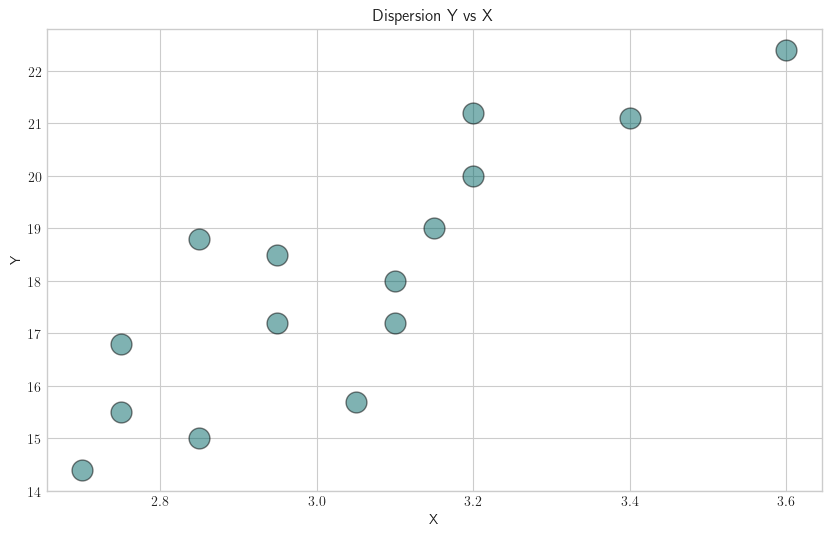

In [4]:
fig, ax = plt.subplots()

ax.plot(CP, salario_inicial,
        marker='o',
        color='#006666',
        markeredgecolor='#000000',
        alpha=0.5,
       linestyle='None',
       markersize=15)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dispersion Y vs X')
plt.show()

Solo se requiere obtener los estimadores de regresion de los parámetros $\beta_0\;y\;\;\beta_1$, dichos estimadores aparecen denotados por $b_0\;\,y\;\;b_1$ respectivamente.

Se obtienen mediante: 

$$b_1=\frac{\sum_{i=1}^{{n}}x_i y_i - \frac{\left (\begin{array}{c}\sum_{i=1}^n x_i\end{array} \right ) \left ( \begin{array}{c}\sum_{i=1}^n y_i \end{array} \right )}{{n}}}{{\sum_{i=1}^n x_i^2- \frac{(\sum_{i=1}^n x_i)^2}{{n}}}}=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i-\bar{y})}{{\sum_{i=1}^n (x_i- \bar{x})^2}}$$

$$b_0=\bar{y} - b_1\bar{x}$$

Las fórmulas requieren una serie de sumatorias para ambas variables, un modo de hacerlo es usando listas de  <i>Python</i>, y usando un diccionario como contenedor.

Se trata entonces de disponer de los términos de modo que satisfagan cada una de las fórmulas. A partir de este punto, por comodidad, llamaré <i>x</i> a la variable independiente <i>CP</i>; y <i>salario_inicial</i>, pasará a llamarse <i>y</i>

In [5]:
datos = {'x': CP,
         'y':salario_inicial,
        'xy':[x*y for x, y in zip(CP, salario_inicial)],
        'x2':[x**2 for x in CP],
        'y2':[y**2 for y in salario_inicial]}

In [6]:
sum_x = sum(datos['x'])
sum_y = sum(datos['y'])
sum_xy = sum(datos['xy'])
sum_x2 = sum(datos['x2'])
sum_y2 = sum(datos['y2'])

In [7]:
b1 = (sum_xy - (sum_x)*(sum_y) / 15) / (sum_x2 - sum_x**2/15)
b1

8.118510158013954

In [8]:
b0 = sum_y / 15 - b1 * sum_x / 15
b0

-6.626937547029094

El cálculo de arriba, simplemente, hace lo siguiente:

$$b_1 = \frac{830.425 - \frac{(45.6)(270.8)}{{15}}}{{139.51 - \frac{(45.6)^2}{{15}}}}=8.12$$

y

$$b_0= \frac{270.8}{{15}} - (8.12) \frac{45.6}{{15}} = -6.63$$

### Estimaciones

El modelo estimado de regresión es:


$$\hat{y}= -6.63+ 8.12  \cdot x$$


o, utilizando la notación original de estas variables:


$$\widehat{salario\_inicial}=-6.63 + 8.12 \cdot CP$$


Usando esta fórmula, se obtienen las estimaciones de $\hat{y}$

In [9]:
salario_estimado = [b0 + b1 * i for i in CP]

salario_estimado = [round(est, 2) for est in salario_estimado]

### Residuos

Para obtener los residuos, se sustraen las estimaciones de las observaciones de $Y$


$$y_i - \hat{y_i}$$

In [10]:
salario_promedio = stats.mean(salario_inicial)
cp_promedio = stats.mean(CP)

In [11]:
residuos = [round(s1 - s2, 2) for s1, s2 in 
            zip(salario_inicial, salario_estimado)]

In [12]:
cuadrado_residuos = [res**2 for res in residuos]

In [13]:
est_res ={'y_estim': salario_estimado,
          'residuos': [round(i - j, 4) for i, j in zip(salario_inicial, salario_estimado)],
          'residuos2':[round((i - j)**2, 4) for i, j in zip(salario_inicial, salario_estimado)],
          'dif_stc':[round((i - salario_promedio)**2, 4) for i in salario_inicial],
          'dif_scr': [round((i - salario_promedio)**2, 4) for i in salario_estimado]
         }

Para poner todos los datos en una tabla:

In [14]:
datos2 = dict(**datos, **est_res)
print(tabulate(datos2, headers='keys', tablefmt='grid'))

+------+------+--------+---------+--------+-----------+------------+-------------+-----------+-----------+
|    x |    y |     xy |      x2 |     y2 |   y_estim |   residuos |   residuos2 |   dif_stc |   dif_scr |
+======+======+========+=========+========+===========+============+=============+===========+===========+
| 2.95 | 18.5 | 54.575 |  8.7025 | 342.25 |     17.32 |       1.18 |      1.3924 |    0.1995 |    0.5378 |
+------+------+--------+---------+--------+-----------+------------+-------------+-----------+-----------+
| 3.2  | 20   | 64     | 10.24   | 400    |     19.35 |       0.65 |      0.4225 |    3.7895 |    1.6813 |
+------+------+--------+---------+--------+-----------+------------+-------------+-----------+-----------+
| 3.4  | 21.1 | 71.74  | 11.56   | 445.21 |     20.98 |       0.12 |      0.0144 |    9.2822 |    8.5654 |
+------+------+--------+---------+--------+-----------+------------+-------------+-----------+-----------+
| 3.6  | 22.4 | 80.64  | 12.96   | 50

Los residuos son las diferencias entre las observaciones (salarios iniciales)  y sus valores estimados; en otras palabras, cada valor residual es la distancia vertical existente entre la observación y el punto sobre la recta estimada de regresión correspondiente.

In [15]:
eq = (r"$\widehat{salario\_inicial}=-6.63+8.12CP$")

In [16]:
l0 = list(zip(CP, salario_inicial))
l0 = sorted(l0, key=lambda x: x[0])

l1 = list(zip(CP, salario_estimado))
l1 = sorted(l1, key=lambda x: x[0])
lines = [[e, f] for e, f in zip(l0, l1)]

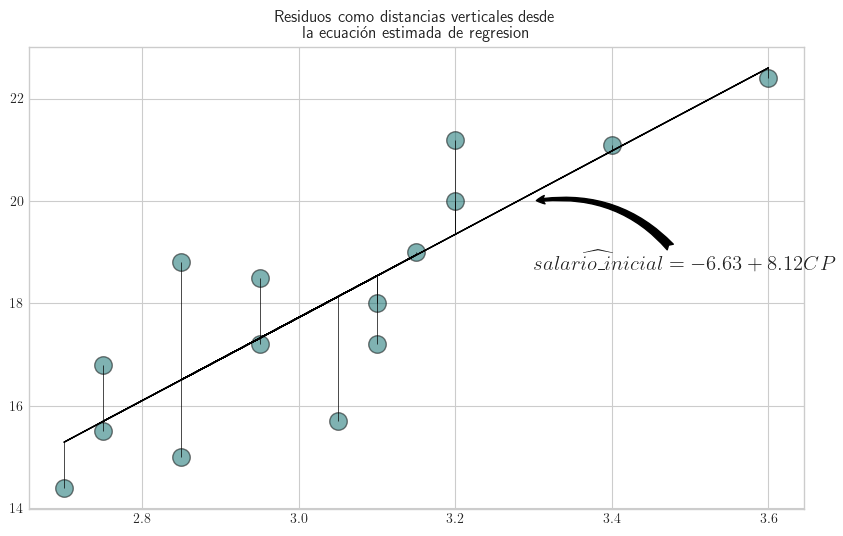

In [17]:
lc = mc.LineCollection(lines, colors='#000000', linewidths=0.5)

fig, ax = plt.subplots()

ax.scatter(x=CP, y=salario_inicial, s= 160, color='#006666', #'#ff8000',
           alpha=0.5,
          edgecolor='#000000')
ax.plot(CP, salario_estimado, color='#000000',
        linewidth=1.0)

plt.title('Residuos como distancias verticales desde\nla ecuación estimada de regresion')
ax.annotate(eq, (3.3, 20), xytext=(0, -50),
           textcoords='offset points',
           fontsize = 15,
           arrowprops=dict(
           arrowstyle='fancy',
           color='#000000',
           connectionstyle='arc3, rad=0.3'),)

ax.add_collection(lc)
ax.autoscale()

### Coeficiente de determinación

Es el porcentaje de la variabilidad muestral de $Y$ que es explicada por $X$.

Se obtiene mediante: $R^2= \frac{SCR}{{STC}}= 1 - \frac{SCE}{{SCT}}$

$SCR=\sum(\hat{y_i} - \bar{y_i})^2$

$SCE=\sum(y_i - \hat{y_i})^2=\sum \epsilon_i^2$

$SCT=\sum(y_i-\bar{y_i})^2$

In [18]:
SCE= sum(est_res['residuos2'])
SCR= sum(est_res['dif_scr'])
STC=sum(est_res['dif_stc'])

In [19]:
R2 = SCR/STC

print('El valor del coeficiente de determinacion es: {}%'.format(round(R2*100, 2)))

El valor del coeficiente de determinacion es: 71.9%


### Error Típico de la Regresión
#### Error cuadrado medio (ECM)


$CME=\frac{\sum e_i^2}{{n-2}}=s^2$

$s=\sqrt{CME}$

In [20]:
n = len(salario_inicial)
CME = SCE/(n - 2)
s =math.sqrt(CME)

In [21]:

CME= SCE/(n -  2)
CME

1.7590076923076927

In [22]:
s = math.sqrt(CME)
s

1.3262758733791746

### Gráfica de  Residuos Estandarizados.

De el supuesto, según el cual,  $E(\epsilon_i|X_i)=0$, se desprende que los errores deben debe ser independientes de la variable independiente $x$, por lo que un gráfico de dispersión de los errores y la variable de $x$, no debería presentar patrón alguno.

Se requieren los residuos estandarizados: $\epsilon_{is}=\frac{\epsilon_i}{{s}}$

In [23]:
res_estandar = [i/s for i in residuos]

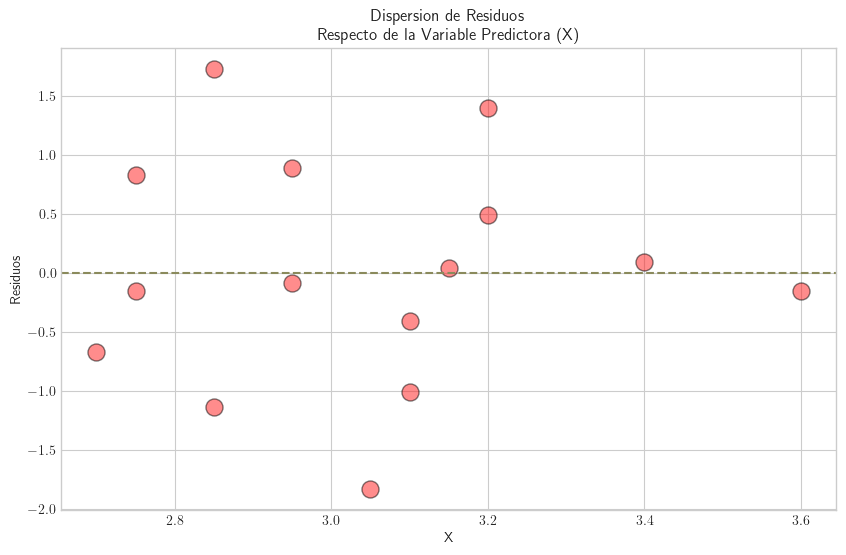

In [24]:
fig, ax = plt.subplots()
ax.scatter(x=CP, y=res_estandar,
           color='#ff1a1a',
           edgecolor='#000000',
           alpha=0.5,
           s=150)
plt.axhline(y=0, color='#8a8a5c', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuos')
plt.title('Dispersion de Residuos\nRespecto de la Variable Predictora (X)')
plt.show()

A simple vista los residuos no parecen presentar ninguna tendencia en particular; además el hecho de que sus valores se mantengan en un intervalo $(2, -2)$, es auspicioso, en el sentido de que no pareciera infringirse el supuesto de no existencia de valores extremos. Tampoco ofrece evidencias visuales suficientes para sospechar crecimiento o decrecimiento de la varianza.

### Inferencia Estadística en el modelo lineal simple

Si los supuestos de la estimación según mínimos cuadrados se cumplen, cabe preguntarse si, más allá de la muestra de datos que se tiene a disposición, esa relación líneal se cumple; para lo cual será necesario que el párametro $\beta_1$ sea distinto de cero; de otro modo no se podría afirmar que exista relación lineal alguna entre los <i>salarios iniciales</i> y las <i>calificaciones promedio</i>.

La siguiente hipótesis, expresa precisamente eso:

$$H_0:\beta_1=0$$

$$H_1:\beta_1 \neq 0$$



Y como estadístico de prueba:

$$t=\frac{b_1}{{s(B_1)}}$$

<p style="text-align:center">Y</p>

$$s(B_1)=\frac{s^2}{{\sum_{i=1}^n (x_i-\bar{x})^2}}$$

In [25]:
dif_cuadrados_x = [round((i - cp_promedio)**2, 4) for i in CP]
suma_dif_cuadrados_x= sum(dif_cuadrados_x)

In [26]:
s2_b1 = CME/suma_dif_cuadrados_x
s_b1 = math.sqrt(s2_b1)
s_b1

1.4090195157742174

In [27]:
t= b1/s_b1
t

5.761815267372686

El resultado obtenido para <i>t</i> puede compararse con una tabla <i>t de Student</i> en el renglon correspodiente a $n - k - 1$ grados de libertad. Debe ocurrir que para un valor <i>t</i>, teórico de una tabla <i>t-Student</i> con 13 grados de libertad y $1 - \alpha/2$ de significación, el valor <i>t</i> resultante de la muestra es superior, en valor absoluto, al valor teórico:

$$\mid t_{muestral} \mid  \gt  \mid t_{1-\alpha/2, n-k-1} \mid$$


En <i>Python</i>, el modulo  <i>scipy</i>, facilita hallar un <i>p-valor</i>

In [28]:
from scipy.stats import t

In [29]:
p_value = 1 - t.cdf(4.1, 13)
2 * p_value

0.0012531431616342736

In [30]:
0.5/100 > 2 * p_value

True

Este <i>p-valor</i> nos indica, que si la hipótesis nula fuera verdadera ($\beta_1=0$), sería muy poco probable que se obtuviera una muestra de salarios y calificaciones como la presente; es decir, que una probabilidad tan baja no es evidencia suficiente de que el valor del coeficiente pueda ser cero: se rechaza la hipótesis nula, incluso a un nivel de confianza del 99%

El contraste para la significancia del coeficiente de regresión, puede hacerse mediante los estadísticos <i>t</i> (muestral vs teórico) o con el <i>p-valor</i>, da lo mismo, pero es más frecuente el uso del <i>p-valor</i>, y muchos <i>softwares</i> lo aportan.

Con lo cual se puede inferir que el valor estimado de $\beta_1$, resulta significativo para un 95% e incluso a un 99% de nivel de confianza; pues $2 * p_value \lt 0.025$, o, lo que es lo mismo, el valor <i>t estimado</i> ($t_e$) es superior al valor <i>t-teórico</i> ($t_{(0.025, 13)}$):

$$t_e=\frac{b_1}{{s(B_1)}}$$

$$|t_e| \gt t_{(0.025, 13)}$$

In [31]:
## Valor t, para significación de 5%, contraste de dos colas y 13 grados de libertad
alpha = 0.05

t_c = abs(t.ppf(1-alpha/2, 13))
t_c

2.1603686564610127

In [32]:
# El valor t muestral, estimado arriba, nivel de confianza 95%

te = 5.76 # estimado arriba

# comparación

te >  abs(t.ppf(1 - alpha/2, 13))

True

In [33]:
# El valor t para 99% de confianza (contraste de dos colas) y 13 grados de libertad

alpha=0.01

te = 5.76 # estimado arriba

te > abs(t.ppf(1-alpha/2, 13))

True

Sólo para mostrar el resultado graficamente:

In [34]:
import numpy as np

In [35]:
x = np.linspace(-6, 6, 1000)
y = t.pdf(x, 13)

In [36]:
tt = (r"$t_{0.025, 13}=2.16$")
tp = (r"$t_{muestral}=5.76$")

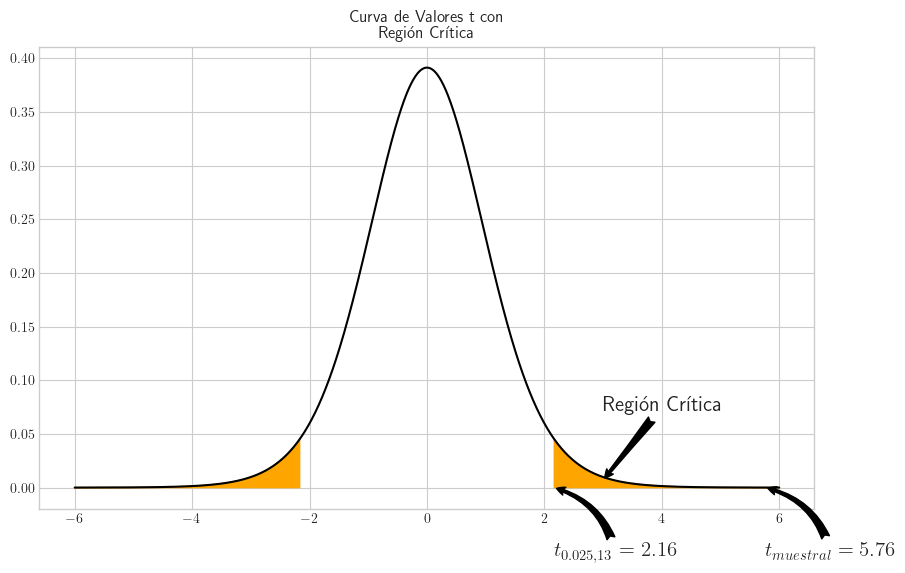

In [37]:
fig, ax = plt.subplots()
ax.plot(x, y, 'k-')
ax.fill_between(x, y, where = (x <= -2.16) | (x > 2.16),
               color = 'orange')
ax.annotate(tt, (2.16, 0), xytext=(0, -50),
            textcoords='offset points',
            fontsize=15,
            arrowprops=dict(
            arrowstyle='fancy',
            color='#000000',
            connectionstyle='arc3, rad=0.3')

)

ax.annotate(tp, (5.76, 0), xytext=(0, -50),
            textcoords='offset points',
            fontsize=15,
            arrowprops=dict(
            arrowstyle='fancy',
            color='#000000',
            connectionstyle='arc3, rad=0.3')

)
ax.annotate("Región Crítica", (3, 0.007), xytext=(0, 50),
            textcoords='offset points',
            fontsize=15,
            arrowprops=dict(
            arrowstyle='fancy',
            color='#000000',
            #connectionstyle='arc3, rad=0.3'
            )

)
plt.title('Curva de Valores t con \nRegión Crítica')
plt.show()

### Intervalo de Confianza para $\hat{\beta_1}$

Un intervalo de confianza para el estimador de $\beta_1$, tiene la siguente forma:

$$\hat{\beta_1} \pm t_{1 - \alpha/2, n - 2}s(\hat{\beta_1})$$

Si $\alpha=0.05$, el intervalo será del $95\%$ de confianza.

In [38]:
# t ~ 2.160
(b1 - t_c * s_b1 , b1 + t_c * s_b1 ) # Intervalo de confianza

(5.074508559793461, 11.162511756234448)

Sin embargo, todo este procedimiento puede abreviarse sustancialmente con el uso de una aplicación; por ejemplo, con el modulo <i>statsmodels</i>, que no esta contenido en la instalación de <i>Python</i> por lo que es necesario instalarlo con <i>pip</i> o <i>conda</i>, según sea el caso.

El código descrito arriba, solo intenta mostrar el <i>paso a paso</i> del proceso de estimación de una regresión lineal simple; pero en modo algúno sería el procedimiento conveniente. Utilizando un modulo se aligera el proceso y se reducen los errores.

In [39]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
CPc= sm.add_constant(CP)
mod = sm.OLS(salario_inicial, CPc).fit()

In [42]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     33.18
Date:                Mon, 29 May 2023   Prob (F-statistic):           6.60e-05
Time:                        08:04:56   Log-Likelihood:                -24.451
No. Observations:                  15   AIC:                             52.90
Df Residuals:                      13   BIC:                             54.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6269      4.298     -1.542      0.147     -15.913       2.659
x1             8.1185      1.409      5.760      0.000       5.074      11.163
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   2.405
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.162
Skew:                           0.013   Prob(JB):                        0.922
Kurtosis:                       2.492   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Cómo se vé, utilizando el modulo se abrevian muchos pasos.  